## Lnphi continuity in a_mix, b_mix

Plot lnphi vs a_mix, all other values constant.  
Plot lnphi vs b_mix, all other values constant.  

Constant values are median values from Case study 1 of Jose:  
a_mix = 1.264791  
b_mix = 0.246725  
b_i = 0.134818  
sum_XjAij = 0.736707  


a_mix, b_mix exclusively determine the number of roots. The figure below shows points where a_mix and b_mix give a single root. The upper-left area shows where the NN cannot be used.  

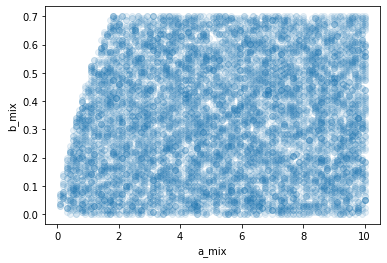
Under what conditions will a_mix and b_mix fall in that region? When Dr. Okuno mentionned most iterations in flash and SS will have a single root? Why?  
Does the presence of boundary introduce learning difficulty for NN? 


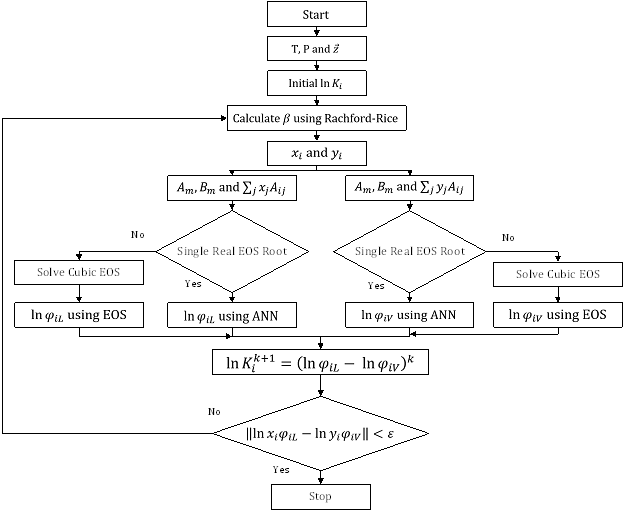

In [1]:
import pandas as pd
import tensorflow as tf
import pickle
from Stability_and_flash import pr
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Load model   
loaded_model = tf.keras.models.load_model(
    r'C:\Users\win7\Desktop\logs\scalars\512_2_40_30_20200722-102956\8092_2_40_880_20200728-230846')
loaded_model.summary()

# Load pipeline
with open(
    r'C:\Users\win7\Desktop\logs\scalars\512_2_40_30_20200722-102956\full_pipeline_8092_2_40_880_.pkl',
    'rb') as f:
    attr_full_pipeline = pickle.load(f)
    #label_full_pipeline = pickle.load(f)

# Instantiate class
pr = pr()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 40)                200       
_________________________________________________________________
dense_101 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_102 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 41        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''# Test pipeline and predict
X = pd.DataFrame(np.array([1.264791, 0.246725, 0.134818, 0.736707])).T
X.columns = ['a_mix', 'b_mix', 'b_i', 'sum']
X = full_pipeline.transform(X)
y_predicted = loaded_model.predict(X)
y_predicted[0,0]
'''

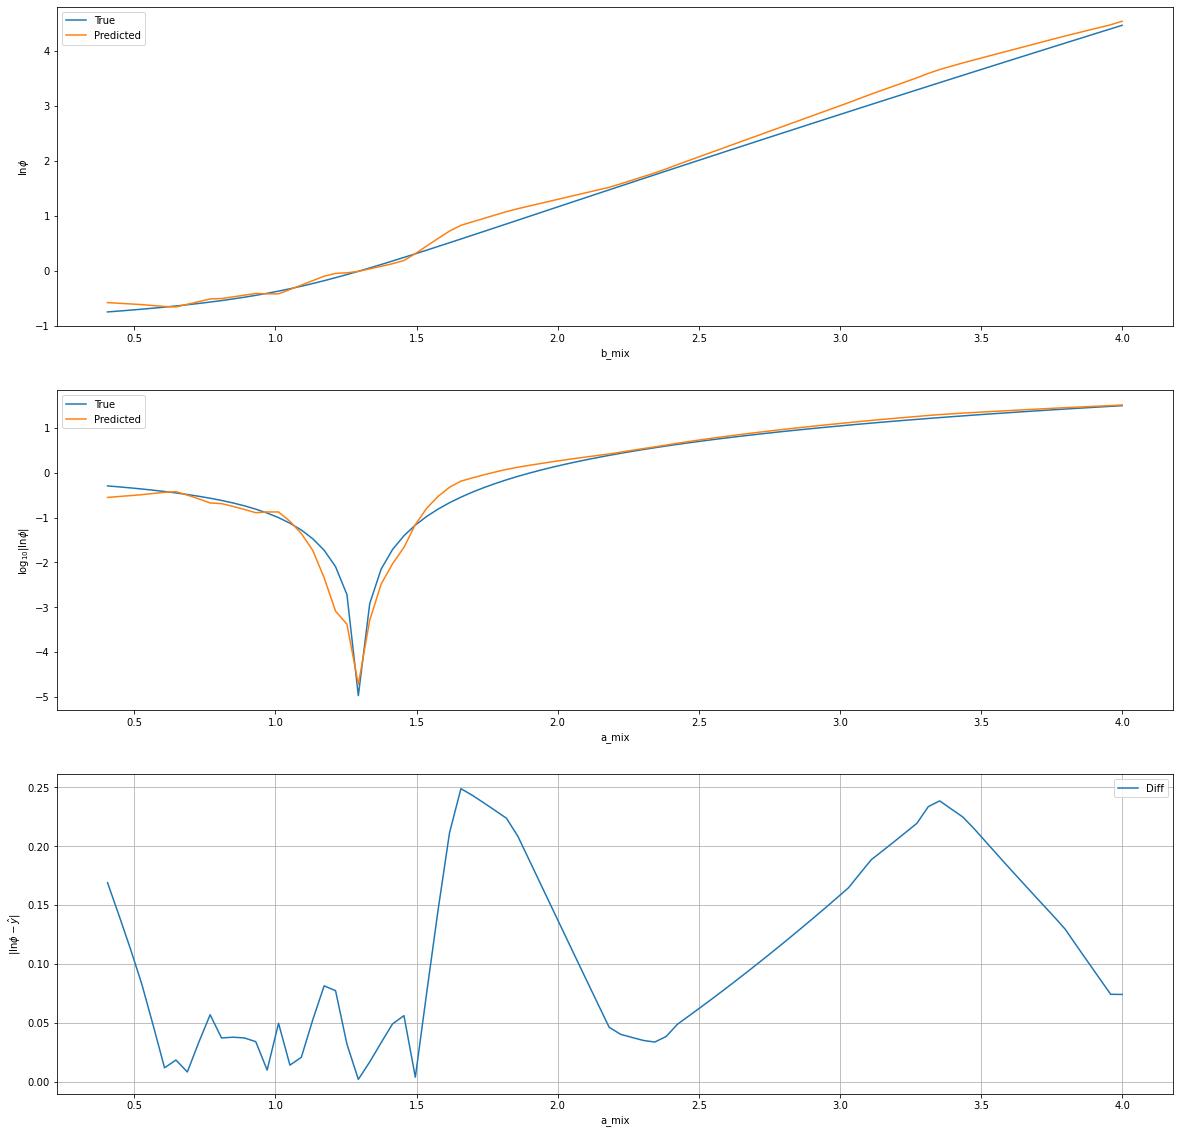

In [8]:
# lnphi vs amix
# Some constants
NRtol = 1E-12
NRmaxit = 100
SStol = 1E-10  #
tolSSSA = 1E-10
SSmaxit = 500  # 1000000
TolRR = 1E-10
TolXz = 1E-8
itSSSAmax = 1E6

R = 8.31446261815324
sqrt2 = 1.41421356237309504
twosqrt2 = 2 * sqrt2
onepsqrt2 = 2.41421356237309504
onemsqrt2 = -0.41421356237309504
phase_num = 1
row_index = 0


# Gen for range of am, bm, b_i, sum
a_mix_min = 0.001
a_mix_max = 4.
num_a_mix = 100

b_mix_min = 0.246725#0.001
b_mix_max = 0.246725#0.7
num_b_mix = 1

b_i_min = 0.134818#0.001
b_i_max = 0.134818#0.7
num_b_i = 1

sum_x_min = 0.736707#0.001
sum_x_max = 0.736707#10.
num_sum_x = 1

X = []
y = []
y_predicted = []
diff = []


for a_mix in np.linspace(a_mix_min, a_mix_max, num_a_mix):
    for b_mix in np.linspace(b_mix_min, b_mix_max, num_b_mix):
        # Check if single root
        Z = pr.Z_roots_calc(a_mix, b_mix)
        if len(Z) > 1:
            continue
        else:
            for b_i in np.linspace(b_i_min, b_i_max, num_b_i):
                for sum_xjAij in np.linspace(sum_x_min, sum_x_max, num_sum_x):
                    # Get true lnphi
                    lnphi = pr.ln_phi_calc(b_i, a_mix, b_mix, sum_xjAij, Z)
                    # Store
                    X.append(a_mix)
                    y.append(lnphi)
                    # Get prediction
                    X_prepared = pd.DataFrame(np.array([a_mix, b_mix, b_i, sum_xjAij])).T
                    X_prepared.columns = ['a_mix', 'b_mix', 'b_i', 'sum']
                    X_prepared = attr_full_pipeline.transform(X_prepared)
                    y_hat = loaded_model.predict(X_prepared)[0,0]
                    #y_hat = label_full_pipeline.inverse_transform(y_hat)[0,0]
                    # Store
                    y_predicted.append(y_hat)
                    # Take log abs difference
                    diff.append(abs(lnphi - y_hat))

fig = plt.figure(figsize=(20,20))
ax3 = fig.add_subplot(311)
ax3.plot(X,y,label='True')
ax3.plot(X,y_predicted,label='Predicted')
ax3.set_ylabel(r'$\ln\phi$')
ax3.set_xlabel('b_mix')
ax3.legend()

ax = fig.add_subplot(312)
ax.plot(X,np.log(np.abs(y)),label='True')
ax.plot(X,np.log(np.abs(y_predicted)),label='Predicted')
ax.set_ylabel(r'$\log_{10}|\ln\phi|$')
ax.set_xlabel('a_mix')
ax.legend()

ax2 = fig.add_subplot(313)
ax2.plot(X,diff,label='Diff')
#ax2.set_title('Log abs diff')
ax2.set_ylabel(r'$|\ln\phi-\hat{y}|$')
ax2.set_xlabel('a_mix')
ax2.legend()
ax2.grid()

plt.show()

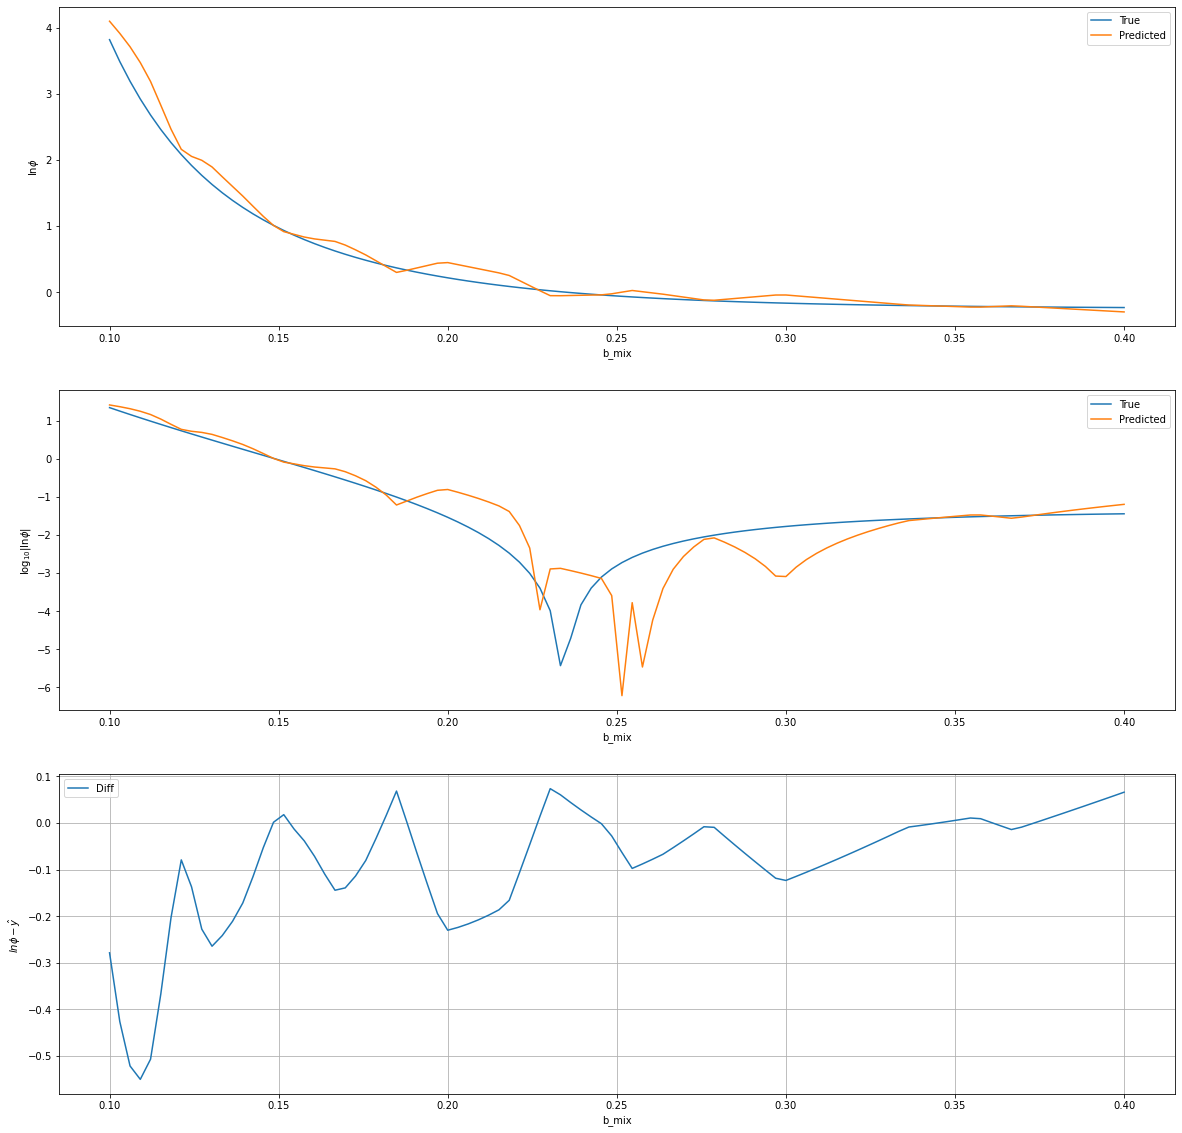

In [5]:
# lnphi vs b_mix
# Some constants
NRtol = 1E-12
NRmaxit = 100
SStol = 1E-10  #
tolSSSA = 1E-10
SSmaxit = 500  # 1000000
TolRR = 1E-10
TolXz = 1E-8
itSSSAmax = 1E6

R = 8.31446261815324
sqrt2 = 1.41421356237309504
twosqrt2 = 2 * sqrt2
onepsqrt2 = 2.41421356237309504
onemsqrt2 = -0.41421356237309504
phase_num = 1
row_index = 0

# Gen for range of am, bm, b_i, sum
a_mix_min = 1.264791
a_mix_max = 1.264791
num_a_mix = 1

b_mix_min = 0.1#0.001
b_mix_max = 0.4#0.7
num_b_mix = 100

b_i_min = 0.134818#0.001
b_i_max = 0.134818#0.7
num_b_i = 1

sum_x_min = 0.736707#0.001
sum_x_max = 0.736707#10.
num_sum_x = 1

X = []
y = []
y_predicted = []
diff = []


for a_mix in np.linspace(a_mix_min, a_mix_max, num_a_mix):
    for b_mix in np.linspace(b_mix_min, b_mix_max, num_b_mix):
        # Check if single root
        Z = pr.Z_roots_calc(a_mix, b_mix)
        if len(Z) > 1:
            continue
        else:
            for b_i in np.linspace(b_i_min, b_i_max, num_b_i):
                for sum_xjAij in np.linspace(sum_x_min, sum_x_max, num_sum_x):
                    # Get true lnphi
                    lnphi = pr.ln_phi_calc(b_i, a_mix, b_mix, sum_xjAij, Z)
                    # Store
                    X.append(b_mix)
                    #y.append(np.log(abs(lnphi)))
                    y.append(lnphi)
                    # Get prediction
                    X_prepared = pd.DataFrame(np.array([a_mix, b_mix, b_i, sum_xjAij])).T
                    X_prepared.columns = ['a_mix', 'b_mix', 'b_i', 'sum']
                    X_prepared = attr_full_pipeline.transform(X_prepared)
                    y_hat = loaded_model.predict(X_prepared)[0,0]
                    #y_hat = label_full_pipeline.inverse_transform(y_hat)[0,0]
                    # Store
                    #y_predicted.append(np.log(abs(y_hat)))
                    y_predicted.append(y_hat)
                    # Take log abs difference
                    diff.append(lnphi - y_hat)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(311)
ax.plot(X,y,label='True')
ax.plot(X,y_predicted,label='Predicted')
ax.set_ylabel(r'$\ln\phi$')
ax.set_xlabel('b_mix')
ax.legend()

ax3 = fig.add_subplot(312)
ax3.plot(X,np.log(np.abs(y)),label='True')
ax3.plot(X,np.log(np.abs(y_predicted)),label='Predicted')
ax3.set_ylabel(r'$\log_{10}|\ln\phi|$')
ax3.set_xlabel('b_mix')
ax3.legend()


ax2 = fig.add_subplot(313)
ax2.plot(X,diff,label='Diff')
ax2.set_ylabel(r'$ln\phi - \hat{y}$')
ax2.set_xlabel('b_mix')
ax2.legend()
ax2.grid()

plt.show()